## Лабораторная работа №1          
## ФИО: Котов Иван Юрьевич
## Группа: РИМ-181226    
## Вариант:           

1) Сначала импортируйте в свой код нужные библиотеки, функции и т.д.

In [13]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import h5py
%matplotlib inline

C:\Users\Vanya\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


2) Создать ВР, являющийся выборкой случайной величины с
нормальным распределением

где данная функция генерирует случайные величины из нормального
распределения размером 1х10000.

In [14]:
X = rand.randn(10000)

3) Создать для него ряд временных отсчетов, на которых он будет
определен: 

где данная функция создает линейный равномерный массив из 10000
элементов в интервале от 3 до 5.

In [389]:
t = np.linspace(3, 5, num = 10000)

4) Построить ВР на заданной временной сетке с помощью функций

5) Должно отобразиться получившееся изображение ВР.

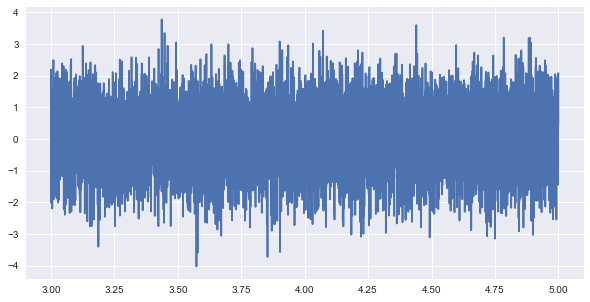

In [16]:
plt.figure(figsize = (10, 5)) # здесь задается размер рисуемой области
plt.plot(t, X)

6) Найти мат. ожидание данного ВР двумя способами:

Во-первых, с помощью функции
M = np.mean(X)
которая считает среднее значение ряда;

Во-вторых, с помощью собственных расчетов на основе формулы (2.7)
из лекции 2.

Внимание! Нужно писать собственные расчеты над временными рядами
в виде операций/функций над массивами, то есть не использовать
циклы. 

Например, здесь нам пригодится функция np.sum(X).

Сравнить полученные результаты расчетов (подсказка – они должны
быть одинаковые).

Через функцию print() можно выводить полученные численные значения.

In [51]:
numpy_mean = np.mean(X)

In [52]:
numpy_mean

0.0024319579706674681

Мат. ожидание можно оценить простым усреднением всех значений ВР:

$$ M_x = \bar x = \frac{1}{N}\sum_{i=1}^N x_i   \quad\text{(2.7)} $$

$$ где \quad x_i = x(t_i) \text{ – анализируемый временной ряд,} $$
    $$N  \text{– количество наблюдений или размер выборки ВР.} $$

In [72]:
def my_mean(X):
    
    return np.sum(X)/len(X)

In [26]:
my_mean(X)

0.0024319579706674681

In [53]:
numpy_mean == my_mean(X)

True

7) Найти дисперсию (variance) данного ВР двумя способами:

С помощью функции
D = np.var(X)
которая считает дисперсию ряда;

С помощью собственных расчетов на основе формулы (2.8) из лекции 2.

Сравнить полученные результаты расчетов.

In [67]:
numpy_variance = np.var(X)

In [68]:
numpy_variance

0.97886944341511117

Оценку дисперсии чаще всего производят по формуле:

$$ D_x = \sigma^2 = \frac{1}{N-1}\sum_{i=0}^{N-1} (x_i - \bar x)^2   \quad\text{(2.8)} $$

которая является наименее чувствительной к ошибке округления.

In [92]:
def my_std(X):
    
    return (np.sum((X - my_mean(X))**2)/len(X))**(1/2)

In [93]:
def my_variance(X):
        
    return my_std(X)**2

In [94]:
my_variance(X)

0.97886944341511117

In [95]:
numpy_variance == my_variance(X)

True

8) Найти асимметрию ВР по формуле (2.9). Найти в Python функцию,
которая считает ту же самую характеристику, искать по ключевому
слову Skewness. Сравнить полученные результаты расчетов.


Ассиметрия:

$$ a = \frac{M[(x-\bar x)^3]}{\sigma^3} \quad\text{(2.9)} $$

In [96]:
def my_skewness(X):    
    
    return my_mean((X - my_mean(X))**3)/(my_std(X)**3)

In [117]:
my_skewness(X)

-0.038558687138900573

In [118]:
scipy.stats.skew(X)

-0.03855868713890057

In [119]:
my_skewness(X) == scipy.stats.skew(X)

True

9) Найти эксцесс ВР по формуле (2.10). Найти в Python функцию,
которая считает ту же самую характеристику, искать по ключевому
слову Kurtosis. Сравнить полученные результаты расчетов.

Эксцесс:

$$ e = \frac{M[(x-\bar x)^4]}{\sigma^4} \quad\text{(2.9)} $$

In [165]:
def my_kurtosis(X):    
    
    #округление до 15 знаков чтобы совпадало с результатом scipy.stats.kurtosis(X,fisher=False)
    return round(float(my_mean((X - my_mean(X))**4)/(my_std(X)**4)),15)

In [109]:
scipy.stats.kurtosis(X)

-0.013039196862789204

In [166]:
my_kurtosis(X)

2.986960803137211

In [107]:
scipy.stats.kurtosis(X) == my_kurtosis(X)

False

Результаты не совпадают поскольку в функции из scipy.stats по умолчанию используется определение Фишера (из результата вычитается 3.0 и за нормальное значение принимается 0.0)

Используем определение Пирсона, при котором за нормальное значение принимается 3.0:

In [161]:
scipy.stats.kurtosis(X,fisher=False)

2.986960803137211

In [295]:
my_kurtosis(X) == scipy.stats.kurtosis(X,fisher=False)

True

10) Построить оценку выборочной автокорреляции ВР несколькими способами (до 20 лага) и построить ее на графике с помощью функции plot_acf(X[0:20]):

На основе расчетов через функции np.correlate(x, x, mode = 'full')

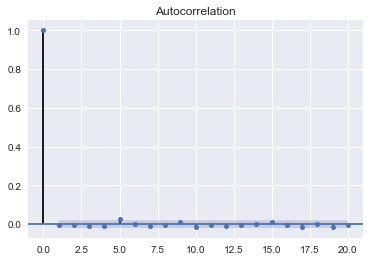

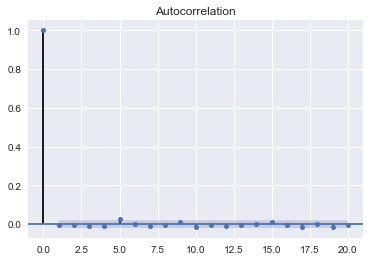

In [357]:
plot_acf(X,lags=20)

In [370]:
def np_autocorr(x):
    result = numpy.correlate(x, x, mode='full')
    return result[int(result.size/2):]

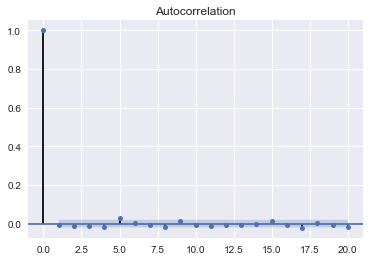

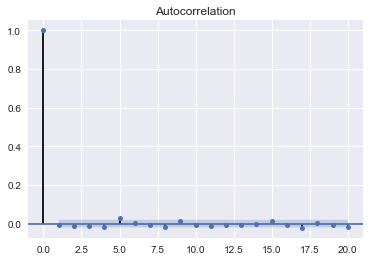

In [372]:
plot_acf(np_autocorr(X),lags = 20)

С помощью собственных расчетов на основе формулы (2.17).

$$ r(l) = 
\frac{(N-l) \sum_{i=1}^{N-l} {y_i y_{i+l}} - (\sum_{i=1}^{N-l} {y_i})\cdot(\sum_{i=1}^{N-l} {y_{i+l}})}
{\sqrt{(N-l)\sum_{i=1}^{N-l} {y_i^2} - (\sum_{i=1}^{N-l} {y_i})^2} \cdot \sqrt{(N-l)\sum_{i=1}^{N-l} {y_{i+l}^2} - (\sum_{i=1}^{N-l} {y_{i+l}})^2}}
\quad\text{(2.17)} $$

In [428]:
def my_correlate(X,lag):
    
    N = len(X)
            
    return ((N - lag) * np.sum(X[lag:] * X[:N-lag]) - np.sum(X[:N-lag]) * np.sum(X[lag:]))\
         / (((N - lag) * np.sum(X[:N-lag]**2) - np.sum(X[:N-lag])**2)**(1/2) * ((N - lag) * np.sum(X[lag:]**2) - np.sum(X[lag:])**2)**(1/2))
    
def my_plot_acf(X,lags):
    
    lags = [x for x in range(lags)]
    plt.plot(lags,[my_correlate(X,l) for l in lags],marker='.')    

Коррелограмма

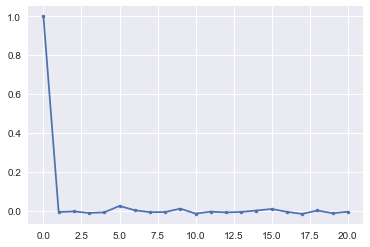

In [429]:
my_plot_acf(X,21)

Сравнение полученных результатов:

Полученные с помощью разных методов графики автокорреляционной функции одианковы

Коэффициент p(1) не обладает самым большим значением по модулю - тренд не покрывает наибольший процент дисперсии исходного ВР

Наиболее высоким оказался p(5)

Ни один из коэффициентов p(l) не является сильно выделяющимся, из чего можно предположить:

1) в ряде нет ни тренда, ни периодики,по характеру он близок к белому шуму; 

2) в ряде есть нелинейный тренд, который скрывает все остальные компоненты.

11) Написать полную функцию, которая имеет один входной
параметр – это исходный временной ряд для анализа.

Функция должна выполнять все вышеперечисленные перечисленные
действия (кроме 1 пункта, конечно же) для того ВР, что был передан ей
в качестве параметра. То есть вычислять мат. ожидание, дисперсию,
асимметрию, эксцесс и строить АКФ.


In [431]:
def analyze(X):
    
    return my_mean(X), my_variance(X), my_skewness(X), my_kurtosis(X) , my_plot_acf(X,21)

12) Получить у преподавателя mat-файлы, содержащие массивы
некоторых ВР, по вариантам. Номер варианта определяется по
последним двум цифрам студенческого билета.

13) Загрузить из этих mat-файлов массив ВР. Например, для 12-го
варианта:
Xmat = h5py.File('12.mat', 'r')
Xmat = Xmat.get('z12')
Xmat = np.array(Xmat)

In [416]:
Xmat = h5py.File('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ временных рядов\\Лабы\\Материалы к лаб работам\\1\\14.mat', 'r')
Xmat = Xmat.get('z14')
Xmat = np.array(Xmat)
Xmat = Xmat.reshape(-1)

14) Используйте уже написанную функцию (пункт 11) от этого ВР
для того, чтобы получить все его базовые характеристики.

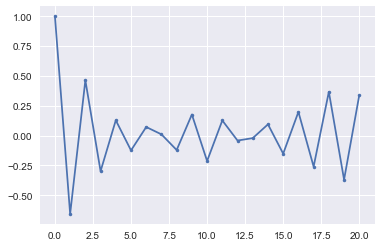

In [432]:
Xmat_mean, Xmat_variance, Xmat_skewness, Xmat_kurtosis, Xmat_correlate = analyze(Xmat)

15) Пояснить, с чем могут быть связаны особенности поведения или
значений тех или иных характеристик.

In [418]:
print(' Mean: '            + str(Xmat_mean) 
      + '\n Variance: '    + str(Xmat_variance) 
      + '\n Skewness: '    + str(Xmat_skewness) 
      + '\n Kurtosis: '    + str(Xmat_kurtosis)
     )

 Mean: -0.0107319314061
 Variance: 0.0683986786987
 Skewness: -0.0792963979074
 Kurtosis: 2.218372063794057


Симметричность распределения близка к нулю. Она имеет отрицательное значение, что означает, что левый хвост распределения больше относительно правого.

Эксцесс распределения превосходит эксцесс гауссового:

In [419]:
my_kurtosis(Xmat)  > 3 * my_std(Xmat)**4

True

Это указывает на значительное число данных с большими амплитудами (хвосты распределения толстые)

1. Акф является знакопеременной, не является монотонной

2. Функция не склонна к затуханию, поэтому ряд нельзя отнести к стационарным ВР однозначно

3. p(1) обладает самым большим значением по модулю из чего следует, что в ряде есть тренд, который занимает значительную долю всей его структуры. 

4. после первого лага самым высоким значением обладает p(2). Это значит, что для каждой точки через одну наблюдается некоторая зависимость. В самом деле, если обратить внимание на ВР, то его значения зачастую «скачут» через одну точку: чередуютсявысокие значения с низкими, так называемый «чередующийся» ряд. Знакопеременная автокорреляция также подтверждает это.

5.Линия тренда не имеет ярко выраженного убывающего или возрастающего характера:


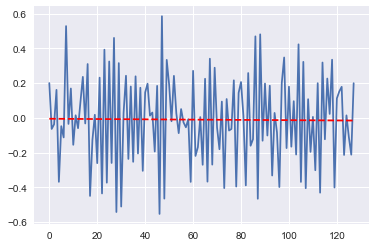

In [420]:
tmat = np.array([x for x in range(len(Xmat))])

plt.plot(tmat,Xmat)

z = numpy.polyfit(tmat,Xmat, 1)
p = numpy.poly1d(z) 
plt.plot(tmat,p(tmat),"r--")

plt.show()